In [1]:
# https://www.kaggle.com/uciml/mushroom-classification

# Attribute Information: (classes: edible=e, poisonous=p)

# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

# bruises: bruises=t,no=f

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

# gill-attachment: attached=a,descending=d,free=f,notched=n

# gill-spacing: close=c,crowded=w,distant=d

# gill-size: broad=b,narrow=n

# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# stalk-shape: enlarging=e,tapering=t

# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

# veil-type: partial=p,universal=u

# veil-color: brown=n,orange=o,white=w,yellow=y

# ring-number: none=n,one=o,two=t

# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import StratifiedKFold

from tensorflow import keras as keras
from keras.regularizers import l2

In [48]:
data = pd.read_csv('./mushrooms.csv')

In [49]:
data.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [50]:
data.shape

(8124, 23)

In [51]:
# missing data
data.isnull().sum() 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

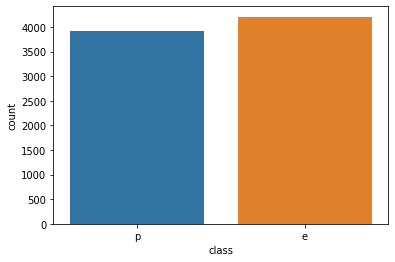

In [52]:
# trujace vs jadalne
sns.countplot(data['class'])


In [8]:
# sns.pairplot(data['veil-type'])
# plt.show()

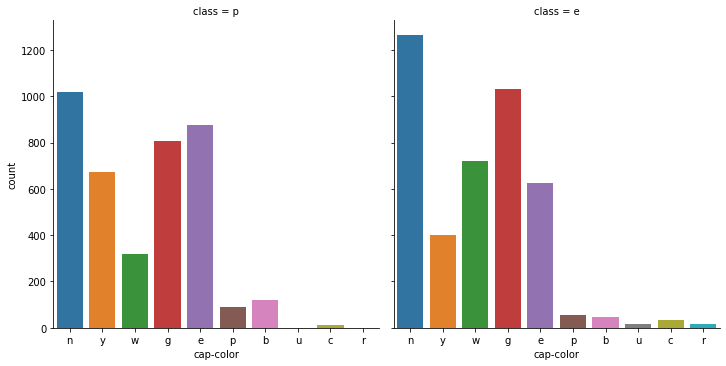

In [53]:
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

g = sns.catplot(x="cap-color",col="class",data=data, kind="count");

In [54]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])


<AxesSubplot:>

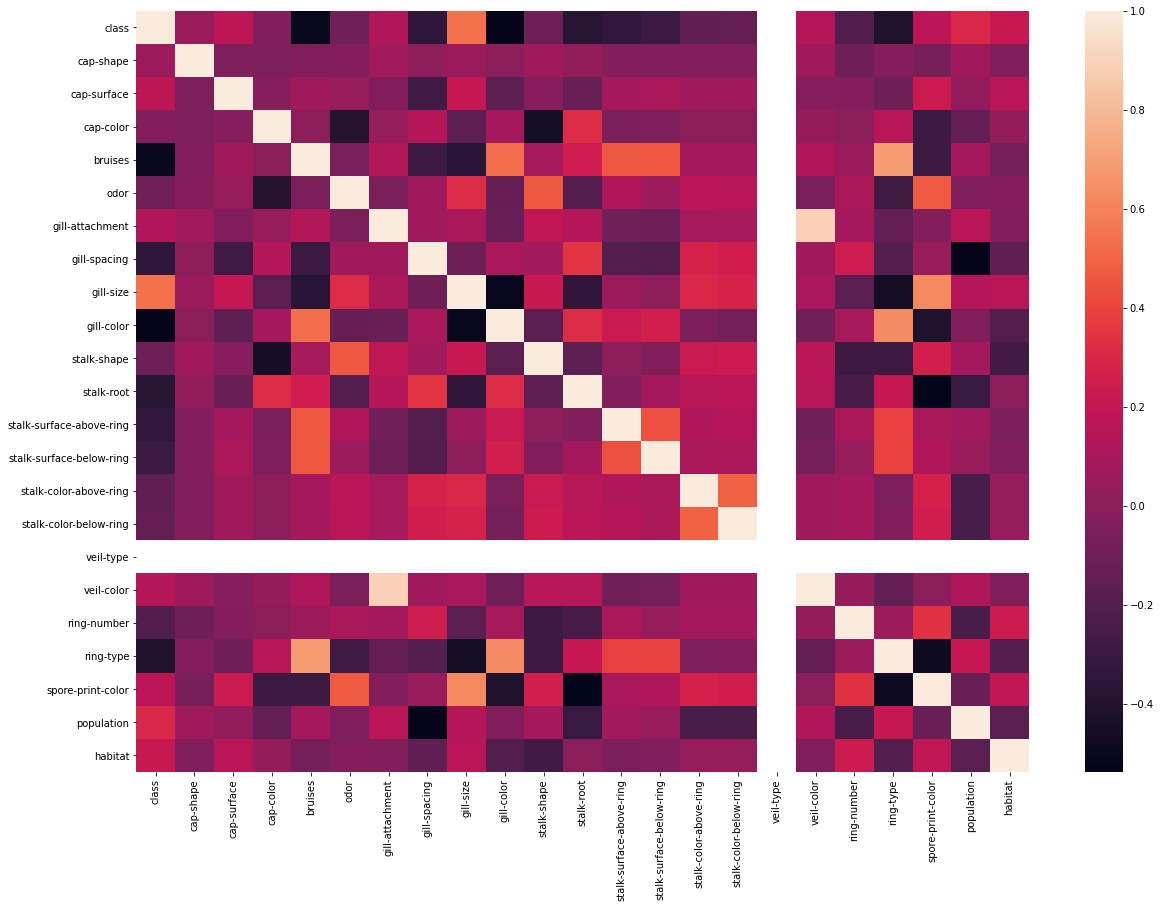

In [55]:
plt.subplots(figsize=(20, 14))
sns.heatmap(data.corr())

In [56]:
X = data.drop(columns=["veil-type","class"],axis = 1)
y = data['class']

In [57]:
X.head().T

,0,1,2,3,4
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4
stalk-shape,0,0,0,0,1


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3,test_size = 0.3)

In [59]:
X_train.shape

(5686, 21)

In [60]:
X_test.shape

(2438, 21)

In [17]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

In [18]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(), Lasso(random_state=seed)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.01, 0.1, 1, 10]
                               },
                    cv=kfold,
                    refit=True)
grid_1.fit(X_train, y_train)
grid_1.best_params_

C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9801274455900568, tolerance: 0.11359531662269126
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3625785338269623, tolerance: 0.11361881732248864
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.024924141642316, tolerance: 0.11362185095625381
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp

C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.513354343256296, tolerance: 0.11359531662269126
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7157137922361017, tolerance: 0.11361881732248864
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.606254474554575, tolerance: 0.11362185095625381
  model = cd_fast.enet_coordinate_descent(
C:\Users\DawOp\

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 4}

In [19]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print("Accuracy on training set: {:.10f}".format(lasso.score(X_train, y_train)))
print("Accuracy on test set: {:.10f}".format(lasso.score(X_test, y_test)))

Accuracy on training set: 0.7157891951
Accuracy on test set: 0.6987565930


In [20]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_2 = GridSearchCV(pipeline_7, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': None,
 'preprocessing': StandardScaler()}

In [21]:
tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=None)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.10f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.10f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.0000000000
Accuracy on test set: 1.0000000000


In [22]:
# svc
svc = svm.SVC()
svc.fit(X_train,y_train)

print("Accuracy on training set: {:.10f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.10f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.9910306015
Accuracy on test set: 0.9889253486


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

history = History()
model = Sequential()
model.add(Dense(100,  activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, 
          y_train,
          validation_data= (X_test, y_test),
          batch_size=32,
          epochs=80,
          callbacks=[history])


Epoch 1/80
178/178 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy: 0.7715 - val_loss: 0.2709 - val_accuracy: 0.8847
Epoch 2/80
178/178 [==============================] - 0s 949us/step - loss: 0.2742 - accuracy: 0.8864 - val_loss: 0.1734 - val_accuracy: 0.9069
Epoch 3/80
178/178 [==============================] - 0s 943us/step - loss: 0.1841 - accuracy: 0.9210 - val_loss: 0.1157 - val_accuracy: 0.9537
Epoch 4/80
178/178 [==============================] - 0s 949us/step - loss: 0.1152 - accuracy: 0.9559 - val_loss: 0.0473 - val_accuracy: 0.9848
Epoch 5/80
178/178 [==============================] - 0s 954us/step - loss: 0.0748 - accuracy: 0.9722 - val_loss: 0.0273 - val_accuracy: 0.9906
Epoch 6/80
178/178 [==============================] - 0s 944us/step - loss: 0.0548 - accuracy: 0.9807 - val_loss: 0.0175 - val_accuracy: 0.9938
Epoch 7/80
178/178 [==============================] - 0s 955us/step - loss: 0.0408 - accuracy: 0.9847 - val_loss: 0.0172 - val_accuracy: 0

Epoch 57/80
178/178 [==============================] - 0s 960us/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 5.4145e-04 - val_accuracy: 1.0000
Epoch 58/80
178/178 [==============================] - 0s 980us/step - loss: 9.9264e-04 - accuracy: 0.9998 - val_loss: 4.7112e-05 - val_accuracy: 1.0000
Epoch 59/80
178/178 [==============================] - 0s 943us/step - loss: 0.0016 - accuracy: 0.9993 - val_loss: 6.2520e-05 - val_accuracy: 1.0000
Epoch 60/80
178/178 [==============================] - 0s 955us/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 7.9543e-04 - val_accuracy: 1.0000
Epoch 61/80
178/178 [==============================] - 0s 960us/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 2.6348e-04 - val_accuracy: 1.0000
Epoch 62/80
178/178 [==============================] - 0s 949us/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 1.5025e-04 - val_accuracy: 1.0000
Epoch 63/80
178/178 [==============================] - 0s 949us/step - loss: 0.0056 - accuracy: 0.9981

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

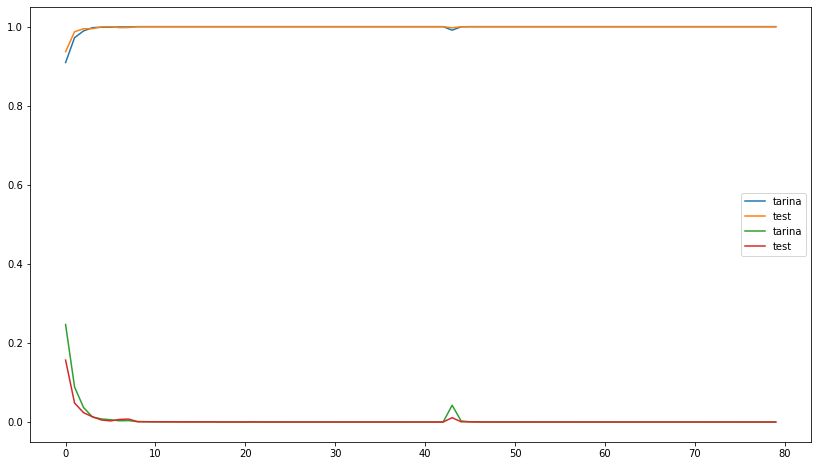

In [44]:
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()
# model_loss = pd.DataFrame(model.history.history)
# model_loss.plot()

import matplotlib.pyplot as plt
plt.subplots(figsize=(14, 8))
# sns.heatmap(data.corr())
plt.plot(history.history['accuracy'], label = "tarina")
plt.plot(history.history['val_accuracy'], label = "test")
plt.plot(history.history['loss'], label = "tarina")
plt.plot(history.history['val_loss'], label = "test")
plt.legend()
plt.show()

In [45]:
preds=model.predict(X_test)
preds = pd.DataFrame(preds)

In [46]:
preds[0] = (preds[0] > .5).astype(int)
metrics.accuracy_score(y_true= y_test, y_pred= preds)

1.0